In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import xgboost as xgb

In [3]:
data = pd.read_pickle("./train_data.pkl")
data.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,1,2,73,20071228.0,175.0,5,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,2
1,3,1,9,32,19970401.0,410.0,3,-9.990000e+02,-999.0,-9.990000e+02,...,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,801.0,813.0,2
2,4,1,8,89,20161228.0,468.0,5,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,2
3,7,1,10,141,20000814.0,353.0,3,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,2
4,9,1,9,32,20050901.0,196.0,3,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,2


# 랜덤포레스트로 feature importance 찾기

In [4]:
trainY = data.pop("OC")
trainX = data

In [5]:
# 랜던포레스트로 피쳐
from sklearn.ensemble import RandomForestClassifier
eclf = RandomForestClassifier(n_estimators=100,
                              max_features=2,
                              n_jobs=-1, oob_score=True)

from sklearn.model_selection import cross_val_score
cross_val_score(eclf, trainX, trainY, cv=5).mean()

0.9468306010928963

In [6]:
eclf.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [7]:
params ={
    "n_estimators" : [10, 20, 30, 50, 100],
    "max_features" : [1,2,3,4,5,6,7, 10, 15, 20, 25, len(trainX.loc[0])]
    }

In [8]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5, n_jobs=-1)
grid = grid.fit(trainX, trainY)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [9]:
grid.best_score_

0.9601328903654485

In [10]:
grid.best_params_

{'max_features': 7, 'n_estimators': 50}

In [11]:
grid.best_estimator_.feature_importances_

array([0.05674663, 0.00678762, 0.0271503 , 0.05313492, 0.08764203,
       0.0362492 , 0.02049844, 0.01573112, 0.01121321, 0.01889239,
       0.01691469, 0.01894676, 0.01816665, 0.00305382, 0.04131769,
       0.00662873, 0.01473444, 0.00853912, 0.00440542, 0.01924206,
       0.00761856, 0.01041237, 0.01704838, 0.01070481, 0.01424833,
       0.00974278, 0.01925655, 0.01358224, 0.00589764, 0.01557546,
       0.0181724 , 0.00849814, 0.01479783, 0.01476081, 0.00494923,
       0.01011496, 0.02508577, 0.0060361 , 0.04359061, 0.01967787,
       0.01197642, 0.01273515, 0.00654583, 0.0101983 , 0.01547476,
       0.00763705, 0.00305862, 0.00807058, 0.00435129, 0.00538382,
       0.00787344, 0.00208812, 0.00941282, 0.00167368, 0.02833398,
       0.03542104, 0.05399902])

In [12]:
featureImportances = np.argsort(grid.best_estimator_.feature_importances_)[::-1]

In [13]:
list(data.columns[featureImportances]) #bedCount, inst_i

['bedCount',
 'inst_id',
 'ownerChange',
 'openDate',
 'profit2',
 'profit1',
 'instkind',
 'employee2',
 'employee1',
 'sgg',
 'interest2',
 'revenue1',
 'liquidAsset2',
 'NCLiabilities1',
 'nonCAsset1',
 'noe1',
 'salary1',
 'revenue2',
 'interest1',
 'receivableL1',
 'noi1',
 'salescost1',
 'surplus1',
 'tanAsset2',
 'sga2',
 'salary2',
 'quickAsset1',
 'liquidLiabilities1',
 'longLoan1',
 'receivableS2',
 'quickAsset2',
 'sga1',
 'debt1',
 'OnonCAsset1',
 'nonCAsset2',
 'noe2',
 'shortLoan1',
 'netAsset2',
 'receivableS1',
 'salescost2',
 'debt2',
 'NCLiabilities2',
 'OnonCAsset2',
 'tanAsset1',
 'sido',
 'liquidAsset1',
 'inventoryAsset2',
 'ctax2',
 'netAsset1',
 'shortLoan2',
 'noi2',
 'inventoryAsset1',
 'liquidLiabilities2',
 'receivableL2',
 'ctax1',
 'longLoan2',
 'surplus2']

In [14]:
# 베스트 파라미터로 훈련
eclf = RandomForestClassifier(n_estimators=100,
                              max_features=7,
                              n_jobs=-1, oob_score=True)
eclf.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [15]:
testData = pd.read_pickle("./test_data.pkl")
testY = testData.pop("OC")
testX = testData

In [16]:
y_pred = eclf.predict(testX)

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(testY, y_pred)

0.023622047244094488

# 그냥 rf만 쓰면 test accuracy가 엄청 낮게 나옴을 볼 수 있다.... 다른방법을!

# Xgboost로 featurImportance보기

In [18]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot as plt
# fit model no training data
model = XGBClassifier()
model.fit(trainX, trainY)
# plot feature importance

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

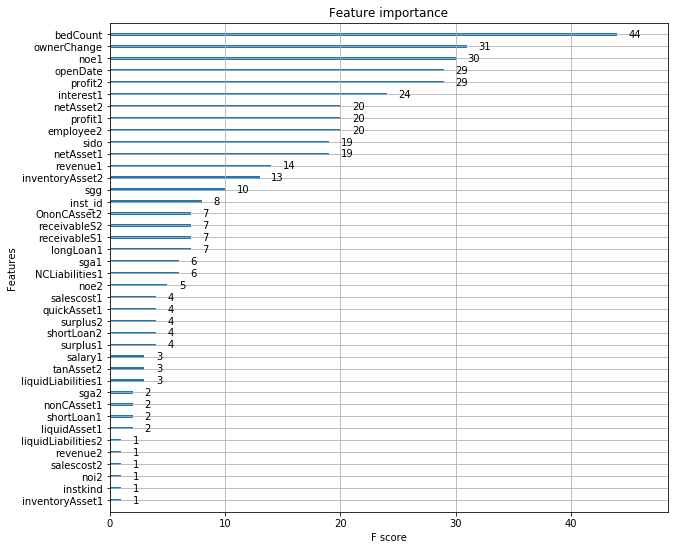

In [97]:
fig, ax = plt.subplots(figsize=(10, 9))
plot_importance(model, ax=ax)
fig.savefig("feature_importance")
# rf와 비슷하게 bedCount가 제일 높게 나옴을 볼수 있고 나머지는 조금 차이는 있지만 profit2도 높은 중요도를 갖고 있음을 볼 수 있다.

In [20]:
model.fit(trainX, trainY)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [21]:
y_pred = model.predict(testX)

accuracy_score(testY, y_pred) # 역시 전처리 eda없이 단일모델 가지고는 한계가 있나보다.

0.05511811023622047

In [22]:
dtrain = xgb.DMatrix(trainX, label=trainY)
dtest = xgb.DMatrix(testX, label=testY)

In [23]:
param = {'max_depth': 2, 'eta': 0.5, 'silent': 1, 'objective': 'binary:logistic'}
param['nthread'] = 7
param['eval_metric'] = "rmse"
evallist = [(dtest, 'eval'), (dtrain, 'train')]
plst = param.items()

In [24]:
num_round = 50
bst = xgb.train(plst, dtrain, num_round, evallist)

[0]	eval-rmse:0.687562	train-rmse:0.312445
[1]	eval-rmse:0.789931	train-rmse:0.234384
[2]	eval-rmse:0.845772	train-rmse:0.198823
[3]	eval-rmse:0.876671	train-rmse:0.176646
[4]	eval-rmse:0.901876	train-rmse:0.164573
[5]	eval-rmse:0.913354	train-rmse:0.156327
[6]	eval-rmse:0.919241	train-rmse:0.149415
[7]	eval-rmse:0.92324	train-rmse:0.14351
[8]	eval-rmse:0.926329	train-rmse:0.133187
[9]	eval-rmse:0.928393	train-rmse:0.127455
[10]	eval-rmse:0.930236	train-rmse:0.123568
[11]	eval-rmse:0.933408	train-rmse:0.113401
[12]	eval-rmse:0.935993	train-rmse:0.109313
[13]	eval-rmse:0.93968	train-rmse:0.104607
[14]	eval-rmse:0.940956	train-rmse:0.101414
[15]	eval-rmse:0.941515	train-rmse:0.096553
[16]	eval-rmse:0.9427	train-rmse:0.092457
[17]	eval-rmse:0.945725	train-rmse:0.086706
[18]	eval-rmse:0.945848	train-rmse:0.085437
[19]	eval-rmse:0.944138	train-rmse:0.083468
[20]	eval-rmse:0.94449	train-rmse:0.080966
[21]	eval-rmse:0.943991	train-rmse:0.078067
[22]	eval-rmse:0.944921	train-rmse:0.075952
[23]

In [25]:
ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)

In [26]:
accuracy_score(testY, y_pred)  # 허허 왜 에러가 점점 늘어나는 걸까 오버피팅 돼서 그런거 같다...

0.05511811023622047

In [27]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

In [28]:
clf = GridSearchCV(model, parameters, n_jobs=-1, 
                   cv=5, 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf.fit(trainX, trainY)
print('Best parameters found by grid search are:', clf.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best parameters found by grid search are: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 5, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [29]:
clf.best_estimator_.predict(testX) == testY

0      False
1      False
2      False
3      False
4      False
       ...  
122    False
123    False
124    False
125    False
126    False
Name: OC, Length: 127, dtype: bool

In [30]:
sum(clf.best_estimator_.predict(testX) == testY) / (len(testY)*1.0)

0.0

In [31]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

In [38]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [40]:
clf = GridSearchCV(model, parameters, n_jobs=-1, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

In [45]:
clf.best_score_

0.7150333733290726

In [44]:
clf.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 11,
 'missing': -999,
 'n_estimators': 5,
 'nthread': 4,
 'objective': 'binary:logistic',
 'seed': 1337,
 'silent': 1,
 'subsample': 0.8}

In [46]:
clf.fit(trainX, trainY)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'nthread': [4], 'objective': ['binary:logistic'], 'learning_rate': [0.05], 'max_depth': [6], 'min_child_weight': [11], 'silent': [1], 'subsample': [0.8], 'colsample_bytree': [0.7], 'n_estimators': [5], 'missing': [-999], 'seed': [1337]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [50]:
testY.unique()

array([0], dtype=int64)

In [48]:
clf.best_estimator_.predict(testX)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [47]:
sum(clf.best_estimator_.predict(testX) == testY) / (len(testY)*1.0)

0.0

# 너무 어려워서 우승자코드보고 따라치면서 리뷰하는식으로 해보았다.
### https://dacon.io/code1/60009

In [82]:
# 데이터 전처리 아이디 제외
#Obtain the submission ID to create the submission file later
sub_id = testX.inst_id #서브미션 파일에 맞추기위한 id받기

In [83]:
############################################################################
############ Random Forest
############################################################################
estimators = 10
np.random.seed(100)
RF_prod = RandomForestClassifier(n_estimators = estimators)
RF_prod_model = RF_prod.fit(trainX, trainY)
RF_prod_prediction = RF_prod.predict_proba(testX)[:,1]

sub_RF = pd.DataFrame({'inst_id' : sub_id , 'OC' : RF_prod_prediction })
sub_RF = sub_RF[['inst_id', 'OC']]

In [84]:
sub_RF.head() #랜덤포레스트를 써서 확률로 예측함을 볼 수 있다.

,inst_id,OC
0,2,1.0
1,5,0.8
2,6,0.6
3,8,0.9
4,10,0.9


In [85]:
from sklearn.ensemble import GradientBoostingClassifier
############################################################################
############ GBM
############################################################################
estimators = 10
np.random.seed(100)
GBM_prod = GradientBoostingClassifier(n_estimators = estimators)
GBM_prod_model = GBM_prod.fit(trainX, trainY)
GBM_prod_prediction = GBM_prod.predict_proba(testX)[:,1]

sub_GBM = pd.DataFrame({'inst_id' : sub_id , 'OC' : GBM_prod_prediction })
sub_GBM = sub_GBM[['inst_id', 'OC']]

In [86]:
sub_GBM.head() # 그레디언트 부스팅 클래스파이어를 써서 확률로 예축함을 볼 수 있다,

,inst_id,OC
0,2,0.966711
1,5,0.443177
2,6,0.666447
3,8,0.976222
4,10,0.966711


In [87]:
############################################################################
############ XGBOOST
############################################################################
dtrain_prod = xgb.DMatrix(data = trainX, label = trainY)
dtest_prod = xgb.DMatrix(data = testX)

#Custom error function for the XGB model
threshold = 0.5
def eval_error(preds, dtrain):
    labels = dtrain.get_label()
    preds = (preds > threshold ).astype('float')
    return "accuracy", accuracy_score(labels, preds)
    

param = {'objective' : 'binary:logistic',
         'max_depth' : 6,
         'eta': 0.3,
         'colsample_bytree' : 1,
         'subsample' : 1,
         'silent' : 0
         }

nrounds = 2

np.random.seed(100)
xgb_model = xgb.train(param, 
                      dtrain_prod, 
                      num_boost_round = nrounds ,
                      feval = eval_error,
                      #maximize = True,
                      #early_stopping_rounds = 10,
                      )

XGB_prediction = xgb_model.predict(dtest_prod)

sub_XGB= pd.DataFrame({'inst_id' : sub_id , 'OC' : XGB_prediction })
sub_XGB= sub_XGB[['inst_id', 'OC']]

In [88]:
sub_XGB.head() # 이것도 확률로 예측

,inst_id,OC
0,2,0.637394
1,5,0.578671
2,6,0.409096
3,8,0.645067
4,10,0.705177


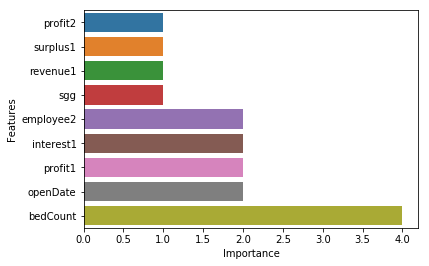

In [93]:
import seaborn as sns
#PLotting the feature importance
xgb_Imp = pd.DataFrame({'Features' : list(xgb_model.get_score().keys()), 
                        'Importance' : list(xgb_model.get_score().values())}).sort_values(['Importance'])
plt.figure()
sns.barplot(xgb_Imp.Importance, xgb_Imp.Features)
plt.show() # 이전에 내가 했던 것과 결과는 비슷함을 볼 수 있다.

In [95]:
############################################################################
#Ensembling the three models
############################################################################

#Forming the ensemble dataset of the 3 models
ensemble = pd.DataFrame()
ensemble['inst_id'] = sub_XGB['inst_id']
ensemble['XGB'] = sub_XGB['OC']
ensemble['GBM'] = sub_GBM['OC']
ensemble['RF'] = sub_RF['OC']

# Taking the average of all 3 models
ensemble['ens'] = (ensemble['XGB'] + ensemble['GBM'] + ensemble['RF'])/3
ensemble['OC'] = (ensemble['ens'] > 0.7).astype('int') #0.7 as the threshold and above that the hospital is closed.

#Printing to see all the hospitals that are classified as closed 
print(ensemble.loc[ensemble['OC'] == 0, ])

ensemble = ensemble.loc[:, ['inst_id', 'OC']]
# 앙상블로 세 모델의 평균을 계산하여 예측하기
# threshold는 0.7로 주어 병원의 폐업을 예측

ensemble.to_csv('submission.csv', index = False)

     inst_id       XGB       GBM   RF       ens  OC
1          5  0.578671  0.443177  0.8  0.607282   0
2          6  0.409096  0.666447  0.6  0.558514   0
13        30  0.409096  0.230173  0.5  0.379756   0
20        48  0.409096  0.627227  0.8  0.612108   0
22        64  0.409096  0.976699  0.7  0.695265   0
40       123  0.409096  0.351031  0.8  0.520042   0
52       165  0.667920  0.918182  0.5  0.695368   0
83       254  0.409096  0.724379  0.6  0.577825   0
84       258  0.409096  0.361162  0.8  0.523419   0
88       293  0.409096  0.724379  0.8  0.644492   0
99       341  0.409096  0.278068  0.6  0.429055   0
120      413  0.409096  0.278068  0.6  0.429055   0
122      424  0.409096  0.312302  0.5  0.407133   0
123      425  0.409096  0.534269  0.5  0.481122   0
124      429  0.409096  0.536108  0.7  0.548401   0
126      431  0.409096  0.536108  0.8  0.581735   0
